In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def feature(x, order=3):
    """Generate polynomial feature of the form
    [1, x, x^2, ..., x^order] where x is the column of x-coordinates
    and 1 is the column of ones for the intercept.
    """
    x = x.reshape(-1, 1)
    return np.power(x, np.arange(order+1).reshape(1, -1)) 

def get_weights_and_indices(I_orig, value_for_mask):
    I = rgb2gray(I_orig) #we can delete this if we get binary images
    mask = I > value_for_mask
    X = np.argwhere(mask)
    weights = I[mask] / float(I.max())
    W = np.diag(weights)
    x = X[:, 1].reshape(-1, 1)
    # Row indices to predict. Origin is at top left corner
    y = X[:, 0]
    return X, W, x, y

def get_fited_lines(order, alpha, y, x):
    A = feature(x, order)
    # w = inv (A^T A + alpha * I) A^T y
    w_unweighted = np.linalg.pinv( A.T.dot(A) + alpha * np.eye(A.shape[1])).dot(A.T).dot(y)
    # w = inv (A^T W A + alpha * I) A^T W y
    w_weighted = np.linalg.pinv( A.T.dot(W).dot(A) + alpha * \
                                np.eye(A.shape[1])).dot(A.T).dot(W).dot(y)
    return w_unweighted, w_weighted

def get_fited_coordinates(I_orig, n_samples, order, w_unweighted, w_weighted):
    x_test = np.linspace(0, I_orig.shape[1], n_samples)
    X_test = feature(x_test, order)
    # Predict y coordinates at test points
    y_test_unweighted = X_test.dot(w_unweighted)
    y_test_weighted = X_test.dot(w_weighted)
    return x_test, y_test_unweighted, y_test_weighted                           

In [6]:
value_for_mask = 0.2 # Pixels to mask in get_weights_and_indices
alpha = 0.01 # Alpha is regularization parameter. Larger alpha => less flexible curve
order = 3 # Order of polynomial
n_samples = 10 # Number of points on the fited lines

In [7]:
I_orig = plt.imread("/Users/carmenlopez/dev/diameterY/test.png")
X, W, x, y = get_weights_and_indices(I_orig, value_for_mask)
w_unweighted, w_weighted = get_fited_lines(order, alpha, y, x)
x_test, y_test_unweighted, y_test_weighted = get_fited_coordinates(I_orig, n_samples, order, w_unweighted, w_weighted)

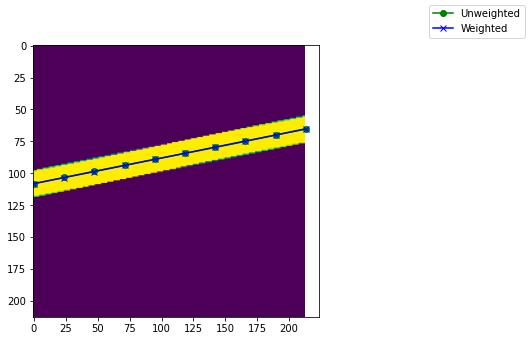

In [8]:

# Display
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(I_orig)
ax.plot(x_test, y_test_unweighted, color="green", marker='o', label="Unweighted")
ax.plot(x_test, y_test_weighted, color="blue", marker='x', label="Weighted")
fig.legend()
fig.savefig("curve.png")